In [25]:
# 0. 사용할 패키지 불러오고, 할당받은 GPU 에서 작업 시작
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session

config = tf.ConfigProto()
config.gpu_options.visible_device_list='1'
config.gpu_options.per_process_gpu_memory_fraction = 0.25
set_session(tf.Session(config=config))

import pandas as pd
from keras.models import Sequential 
from keras.layers import Dense 
import numpy as np 

#랜덤시드 고정
np.random.seed(100)


In [38]:
# 1. 데이터셋 생성하기 : 원본 데이터 불러오기
df = pd.read_csv('pima-indians-diabetes.csv')
df.head() 
len(df)
df['class'].unique()

array([1, 0])

In [39]:
# 1. 데이터셋 생성하기 : 학습데이터 구성
x_train = df.iloc[:700, 0:8]
y_train = df.iloc[:700, 8]
x_test = df.iloc[700:, 0:8]
y_test = df.iloc[700:, 8]

In [40]:
# 2. 모델 구성하기
model = Sequential() 
model.add(Dense(12, input_dim=8, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [28]:
# 2. 모델 구성하기
from keras.layers import Activation

model = Sequential() 
model.add(Dense(12, kernel_initializer='normal', input_shape=(8,)))
model.add(Activation('relu'))
model.add(Dense(8))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))          

In [41]:
# 3. 모델 학습과정 설정하기
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
700/700 [==============================] - 0s 712us/step - loss: 1.3741 - acc: 0.5743
Epoch 2/100
700/700 [==============================] - 0s 58us/step - loss: 0.9878 - acc: 0.5529
Epoch 3/100
700/700 [==============================] - 0s 59us/step - loss: 0.8315 - acc: 0.5514
Epoch 4/100
700/700 [==============================] - 0s 59us/step - loss: 0.7021 - acc: 0.5886
Epoch 5/100
700/700 [==============================] - 0s 58us/step - loss: 0.6650 - acc: 0.6743
Epoch 6/100
700/700 [==============================] - 0s 60us/step - loss: 0.6428 - acc: 0.6886
Epoch 7/100
700/700 [==============================] - 0s 57us/step - loss: 0.6337 - acc: 0.6757
Epoch 8/100
700/700 [==============================] - 0s 57us/step - loss: 0.6261 - acc: 0.6800
Epoch 9/100
700/700 [==============================] - 0s 57us/step - loss: 0.6145 - acc: 0.6971
Epoch 10/100
700/700 [==============================] - 0s 59us/step - loss: 0.6092 - acc: 0.6900
Epoch 11/100
700/700 [======

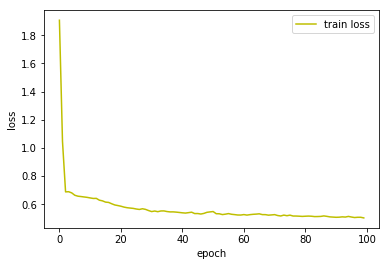

In [32]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots() 
#acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
#loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

#acc_ax.plot(hist.history['acc'], 'b', label='train acc')
#acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
#acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper right')
#acc_ax.legend(loc='lower left')

plt.show()


In [ ]:
# 5. 모델 평가하기
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

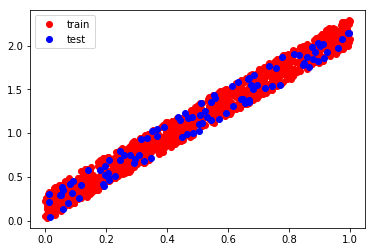

In [45]:
import numpy as np

# 데이터셋 생성
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

# 데이터셋 확인
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x_train, y_train, 'ro')
plt.plot(x_test, y_test, 'bo')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [52]:
x_test.reshape(100,)


array([0.95759789, 0.1477137 , 0.12978936, 0.15541677, 0.20652116,
       0.9438589 , 0.34730661, 0.15164526, 0.46273312, 0.22878526,
       0.27365087, 0.26158227, 0.95572991, 0.04831284, 0.2004817 ,
       0.90283794, 0.0987545 , 0.24881928, 0.25474994, 0.12122407,
       0.01160945, 0.37067777, 0.32533938, 0.29582298, 0.5588393 ,
       0.39663413, 0.57940374, 0.07471124, 0.68701413, 0.0183769 ,
       0.05498817, 0.26527837, 0.00681839, 0.32141663, 0.91759277,
       0.73550428, 0.6628145 , 0.44932451, 0.66229244, 0.26154697,
       0.05569387, 0.48925561, 0.07633199, 0.16583116, 0.89602814,
       0.62501852, 0.59249228, 0.18987587, 0.33964025, 0.39226398,
       0.75080305, 0.04938718, 0.46203933, 0.59787623, 0.77869207,
       0.49353504, 0.24149872, 0.7207678 , 0.0368562 , 0.48158789,
       0.57621364, 0.28582489, 0.84912637, 0.78978321, 0.73021404,
       0.86483912, 0.77764358, 0.30331285, 0.34284409, 0.32500248,
       0.90731424, 0.26494697, 0.10864943, 0.19409   , 0.18694

In [50]:
# 0. 사용할 패키지 불러오기
import numpy as np
from sklearn.metrics import mean_squared_error
import random

# 1. 데이터셋 생성하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

x_train = x_train.reshape(1000,)
y_train = y_train.reshape(1000,)
x_test = x_test.reshape(100,)
y_test = y_test.reshape(100,)

# 2. 모델 구성하기
w = np.cov(x_train, y_train, bias=1)[0,1] / np.var(x_train)
b = np.average(y_train) - w * np.average(x_train)

print w, b

# 3. 모델 평가하기
from sklearn.metrics import mean_squared_error
y_predict = w * x_test + b
mse = mean_squared_error(y_test, y_predict)
print('mse : ' + str(mse))

0.0 1.1790127767732859
mse : 0.3574472847958718


Epoch 1/50
1000/1000 [==============================] - 0s 293us/step - loss: 1.1916
Epoch 2/50
1000/1000 [==============================] - 0s 27us/step - loss: 1.1329
Epoch 3/50
1000/1000 [==============================] - 0s 28us/step - loss: 1.0833
Epoch 4/50
1000/1000 [==============================] - 0s 27us/step - loss: 1.0361
Epoch 5/50
1000/1000 [==============================] - 0s 27us/step - loss: 0.9897
Epoch 6/50
1000/1000 [==============================] - 0s 27us/step - loss: 0.9448
Epoch 7/50
1000/1000 [==============================] - 0s 27us/step - loss: 0.9009
Epoch 8/50
1000/1000 [==============================] - 0s 26us/step - loss: 0.8582
Epoch 9/50
1000/1000 [==============================] - 0s 27us/step - loss: 0.8168
Epoch 10/50
1000/1000 [==============================] - 0s 27us/step - loss: 0.7767
Epoch 11/50
1000/1000 [==============================] - 0s 27us/step - loss: 0.7377
Epoch 12/50
1000/1000 [==============================] - 0s 27us/step - l

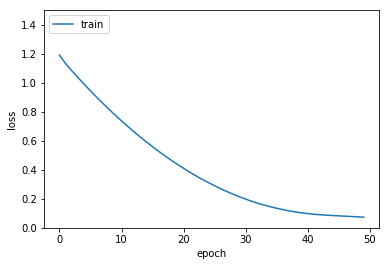

100/100 [==============================] - 0s 957us/step
loss : 0.08235937148332596


In [53]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

# 1. 데이터셋 생성하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(1, input_dim=1))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=50, batch_size=64)
w, b = model.get_weights()
print w, b

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 6. 모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ' + str(loss))

Epoch 1/50
1000/1000 [==============================] - 0s 245us/step - loss: 1.6329
Epoch 2/50
1000/1000 [==============================] - 0s 33us/step - loss: 1.2747
Epoch 3/50
1000/1000 [==============================] - 0s 32us/step - loss: 1.0003
Epoch 4/50
1000/1000 [==============================] - 0s 33us/step - loss: 0.7627
Epoch 5/50
1000/1000 [==============================] - 0s 33us/step - loss: 0.5576
Epoch 6/50
1000/1000 [==============================] - 0s 33us/step - loss: 0.3857
Epoch 7/50
1000/1000 [==============================] - 0s 32us/step - loss: 0.2490
Epoch 8/50
1000/1000 [==============================] - 0s 34us/step - loss: 0.1546
Epoch 9/50
1000/1000 [==============================] - 0s 34us/step - loss: 0.0993
Epoch 10/50
1000/1000 [==============================] - 0s 33us/step - loss: 0.0763
Epoch 11/50
1000/1000 [==============================] - 0s 34us/step - loss: 0.0646
Epoch 12/50
1000/1000 [==============================] - 0s 34us/step - l

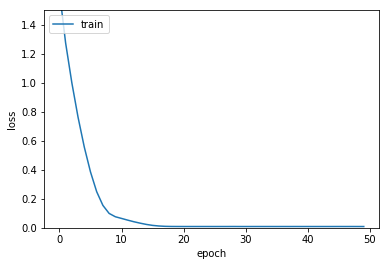

100/100 [==============================] - 0s 650us/step
loss : 0.009978837519884109


In [22]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

# 1. 데이터셋 생성하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=50, batch_size=64)

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 6. 모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ' + str(loss))

Epoch 1/50
1000/1000 [==============================] - 0s 417us/step - loss: 0.9084
Epoch 2/50
1000/1000 [==============================] - 0s 40us/step - loss: 0.2136
Epoch 3/50
1000/1000 [==============================] - 0s 42us/step - loss: 0.0478
Epoch 4/50
1000/1000 [==============================] - 0s 43us/step - loss: 0.0301
Epoch 5/50
1000/1000 [==============================] - 0s 44us/step - loss: 0.0177
Epoch 6/50
1000/1000 [==============================] - 0s 42us/step - loss: 0.0111
Epoch 7/50
1000/1000 [==============================] - 0s 43us/step - loss: 0.0099
Epoch 8/50
1000/1000 [==============================] - 0s 40us/step - loss: 0.0099
Epoch 9/50
1000/1000 [==============================] - 0s 44us/step - loss: 0.0099
Epoch 10/50
1000/1000 [==============================] - 0s 42us/step - loss: 0.0098
Epoch 11/50
1000/1000 [==============================] - 0s 43us/step - loss: 0.0097
Epoch 12/50
1000/1000 [==============================] - 0s 42us/step - l

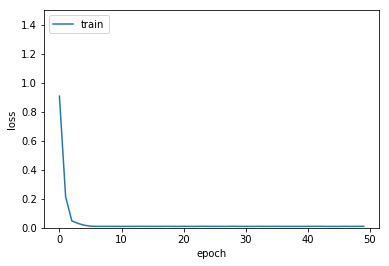

100/100 [==============================] - 0s 736us/step
loss : 0.008717193247866817


In [23]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

# 1. 데이터셋 생성하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=50, batch_size=64)

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 6. 모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ' + str(loss))